# Supply Chain Emissions Modeling Using Industry and Commodity Data (2010–2016)

Problem Statement:

You have annual supply chain emission data from 2010–2016 categorized into industries and commodities. The goal is to develop a regression model that can predict the Supply Chain Emission Factors with Margins based on descriptive and quality metrics (substance, unit, reliability, temporal/geographical/technological/data collection correlations, etc.).

# 🌱 Greenhouse Gas Emission Prediction Project

![GHG Emissions](https://www.shalom-education.com/wp-content/uploads/2022/12/Shutterstock_1667551381-1-1024x1006.jpg)

**Project Goal:**  
To analyze and predict greenhouse gas (GHG) emissions from various U.S. industries and commodities using the official dataset from [data.gov](https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-for-us-industries-and-commodities).

![GHG Emissions](https://edg.epa.gov/EPALogo.svg)

**Source:**  
[Supply Chain Greenhouse Gas Emission Factors](https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-for-us-industries-and-commodities)

  
**Tools:** Python, Pandas, Scikit-learn, Matplotlib, Seaborn  


## 📂 Dataset Overview

This dataset contains supply chain emission factors associated with various U.S. industries and commodities.

**Key Columns:**
- `Code`: Industry classification code
- `Industry_Name`: Name of the industry
- `Commodity`: Item or commodity name
- `GHG_Emissions_kgCO2e`: GHG emissions per unit (kg CO2 equivalent)
- `Units`: Measurement units (e.g., [kg/2018 USD, purchaser price])



## 🧹 Data Preprocessing

Steps:
- Handle missing values
- Convert units where needed
- Encode categorical features
- Normalize/scale numeric columns

## 🤖 Model Building & Evaluation

We aim to predict `GHG_Emissions_kgCO2e` using regression models.

Models to try:
- Linear Regression
- Random Forest

**Evaluation Metrics:**
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² Score


##### Steps:
- Step 1: Import Required Libraries
- Step 2: Load Dataset
- Step 3: Data Preprocessing (EDA+Cleaning+Encoding)
- Step 4: Training
- Step 5: Prediction and Evaluation
- Step 6: Hyperparameter Tuning
- Step 7: Comapartive Study and Slecting the Best model 


# Step 1: Import Required Libraries

In [6]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Step 2: Load Dataset

In [7]:
excel_file = r'C:\Users\Tejashwini\Downloads\af60b10b8dad38110304.xlsx'
years = range(2010, 2017)

In [8]:
years[2]

2012

In [9]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [22]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [10]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')
        
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year
        
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)
        
        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)
        
        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))
        
    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [11]:
all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013


In [14]:
len(all_data)

7

In [15]:
df = pd.concat(all_data, ignore_index=True)
df.head(10)

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010
5,1111B0,"Fresh wheat, corn, rice, and other grains",methane,"kg/2018 USD, purchaser price",0.008,0.001,0.009,NaN,2,3,1,1,1,Commodity,2010
6,1111B0,"Fresh wheat, corn, rice, and other grains",nitrous oxide,"kg/2018 USD, purchaser price",0.004,0.000,0.004,NaN,4,3,1,4,1,Commodity,2010
7,1111B0,"Fresh wheat, corn, rice, and other grains",other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,3,1,3,1,Commodity,2010
8,111200,"Fresh vegetables, melons, and potatoes",carbon dioxide,"kg/2018 USD, purchaser price",0.183,0.132,0.315,NaN,3,3,1,4,1,Commodity,2010
9,111200,"Fresh vegetables, melons, and potatoes",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010


In [16]:
len(df)

22092

# Step 3: Data Preprocessing

In [17]:
df.columns # Checking columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [18]:
df.isnull().sum()

Code                                                          0
Name                                                          0
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed: 7                                                22092
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
dtype: int64

C:\Users\Tejashwini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tejashwini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


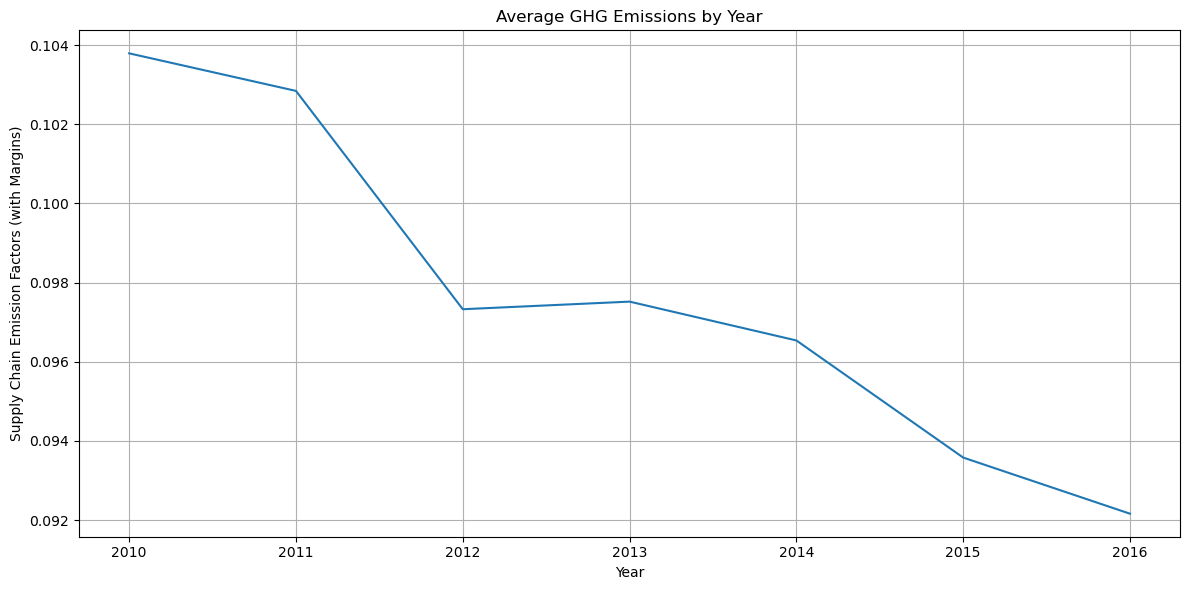

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df,
    x='Year',
    y='Supply Chain Emission Factors with Margins',
    estimator='mean',
    errorbar=None  # replaces deprecated `ci=None`
)
plt.title("Average GHG Emissions by Year")
plt.xlabel("Year")
plt.ylabel("Supply Chain Emission Factors (with Margins)")
plt.grid(True)
plt.tight_layout()
plt.show()
